<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Solution

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

**Solution**: The null hypothesis should have an equals sign and not an inequality.  The reason for this is that the null hypothesis defines the distribution that we will compare our data against.  A claim like $\mu < 30$ does not specify a particular value of $\mu$ that we can define our distribution by. 

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

**Solution**: The null hypothesis should include the population mean, e.g. $H_0: \mu = 30$. A hypothesis test about the sample mean (1) is very easy to do (just look at the sample mean) and (2) tells you nothing about the population. 

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**Solution**: The p-value is not a probability that the null hypothesis is true or false.  The p-value represents the probability, under the null hypothesis, that we observe a test-statistic as extreme or more extreme than the one we got from the data. 

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

**Solution**: Ketelbells is incorrectly comparing the test-statistic $z$ to the significance level $\alpha$, which makes no sense.  Instead he should compare the test-statistic to the relevant critical value $z_\alpha$.  Alternatively, he could compute a $p$-value associated with the test statistic and compare this value to the significance level. 

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [2]:
# SOLUTION:

dfMPG = pd.read_csv('data/auto-mpg.data', sep='\s+') # TODO - need extra arguments to read correctly

dfMPG.head()

dfMPG.columns = ["mpg", "cylinders","displacement",'horsepower','weight','acceleration'
                , 'model year', 'origin', 'car name']
dfMPG = dfMPG.replace({'?':np.nan})
dfMPG.dropna()
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In [3]:
# SOLUTION:

alp = 0.05
z = stats.norm.ppf(1-0.5*alp)
xbar = dfMPG["mpg"].mean()
stderr = dfMPG["mpg"].std(ddof=1)/np.sqrt(len(dfMPG))
CI = [xbar + pm*z*stderr for pm in [-1,1]]
print(CI)

[22.759136365891397, 24.29779058624968]


**Solution:**

The 95% CI is [22.76, 24.30] mpg. This does not include 20 mpg, so we can conclude at the 95% confidence level that there is sufficient evidence that the mean gas mileage is better than 20 mpg.

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

**Solution**: 

Let $\mu_{46}$ and $\mu_8$ be the true mean gas mileages of vehicles with 4 or 6 cylinders (as a single population) and those with 8 cylinders, respectively. We want to test the hypotheses 

$$
H_0: \mu_{46} - \mu_8 = 10
\\ 
H_1: \mu_{46} - \mu_8 > 10
$$

We perform a one-tailed test for the difference of two means.  Let $\bar{x}_{46}$ and $\bar{x}_8$ be the sample means and $s_{46}$ and $s_8$ be the sample standard deviations for the two groups.  Then our test statistic is 

$$
Z = \left(\bar{x}_{46}-\bar{x}_8 - 10\right)\bigg/\sqrt{\frac{s_{46}^2}{n_{46}} + \frac{s_8^2}{n_8}} \sim N(0,1) 
$$

We can perform the test either using either rejection regions or p-values.  The equivalent tests are 

**Rejection Region**: Reject the Null Hypothesis if $Z > z_{0.01} = 2.33$, otherwise fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = 1-\Phi(Z) < 0.01$, otherwise fail to reject the Null 

In [4]:
alp = 0.01
n46, n8 = np.sum(dfMPG.cylinders==4)+np.sum(dfMPG.cylinders==6), np.sum(dfMPG.cylinders==8)

xbar46 = dfMPG.loc[(dfMPG.cylinders==4) | (dfMPG.cylinders==6), "mpg"].mean()
xbar8 = dfMPG.loc[dfMPG.cylinders==8, "mpg"].mean()

var46 = dfMPG.loc[(dfMPG.cylinders==4) | (dfMPG.cylinders==6), "mpg"].var()/len(dfMPG.loc[(dfMPG.cylinders==4) | (dfMPG.cylinders==6), "mpg"])
var8 = dfMPG.loc[dfMPG.cylinders==8, "mpg"].var()/len(dfMPG.loc[dfMPG.cylinders==8, "mpg"])

SE_468 = np.sqrt(var46 + var8)
Z_468 = (xbar46 - xbar8 - 10)/SE_468

print("4/6 CYL VS 8 CYL COMPARISON")
print("  test statistic:  Z = {:0.4f}".format(Z_468))
print("  critical value: Zc = {:0.4f}".format(stats.norm.ppf(1-alp)))
print("")
print("  p-value = {:0.4f}".format(1-stats.norm.cdf(Z_468)))

4/6 CYL VS 8 CYL COMPARISON
  test statistic:  Z = 3.3797
  critical value: Zc = 2.3263

  p-value = 0.0004


**Rejection Rejection**:  Since the test statistic for $Z$ (3.38) is outside the critical value that defines the border of the rejection region (2.33), we reject the Null Hypothesis that the mean gas mileage for 4 or 6 cylinder vehicles is 10 mpg better (higher) than the mean gas mileage for 8-cylinder vehicles.

**P-Value test**:  Since the p-value is less than $\alpha = 0.01$, we reject the Null Hypothesis.

**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

**Solution**: 

Let $\mu_{4}$ and $\mu_6$ be the true mean gas mileages of vehicles with 4 and 6 cylinders, respectively. We want to test the hypotheses 

$$
H_0: \mu_{4} - \mu_6 = 0
\\ 
H_1: \mu_{4} - \mu_6 > 0
$$

We perform a one-tailed test for the difference of two means.  Let $\bar{x}_{4}$ and $\bar{x}_6$ be the sample means and $s_{4}$ and $s_6$ be the sample standard deviations for the two groups.  Then our test statistic is 

$$
Z = \left(\bar{x}_{4}-\bar{x}_6\right)\bigg/\sqrt{\frac{s_{4}^2}{n_{4}} + \frac{s_6^2}{n_6}} \sim N(0,1) 
$$

We can perform the test either using either rejection regions or p-values.  The equivalent tests are 

**Rejection Region**: Reject the Null Hypothesis if $Z > z_{0.01} = 2.33$, otherwise fail to reject the Null Hypothesis

**P-Value Test**: Reject the Null Hypothesis if $\textrm{p-value} = \textrm{min}(\Phi(-Z), 1-\Phi(Z)) < 0.01$, otherwise fail to reject the Null 

In [5]:
alp = 0.01
n4, n6 = np.sum(dfMPG.cylinders==4), np.sum(dfMPG.cylinders==6)

xbar4 = dfMPG.loc[dfMPG.cylinders==4, "mpg"].mean()
xbar6 = dfMPG.loc[dfMPG.cylinders==6, "mpg"].mean()

var4 = dfMPG.loc[dfMPG.cylinders==4, "mpg"].var()/len(dfMPG.loc[dfMPG.cylinders==4, "mpg"])
var6 = dfMPG.loc[dfMPG.cylinders==6, "mpg"].var()/len(dfMPG.loc[dfMPG.cylinders==6, "mpg"])

SE_46 = np.sqrt(var4 + var6)
Z_46 = (xbar4 - xbar6)/SE_46

print("4 VS 6 CYL COMPARISON")
print("  test statistic:  Z = {:0.4f}".format(Z_46))
print("  critical value: Zc = {:0.4f}".format(stats.norm.ppf(1-alp)))
print("")
print("  p-value = {:0.4f}".format(1-stats.norm.cdf(Z_46)))

4 VS 6 CYL COMPARISON
  test statistic:  Z = 16.1325
  critical value: Zc = 2.3263

  p-value = 0.0000


**Rejection Rejection**:  Since the test statistic for $Z$ (16.13) is outside the critical value that defines the border of the rejection region (2.33), we reject the Null Hypothesis that the mean gas mileage for 4 cylinder vehicles is better (higher) than the mean gas mileage for 6-cylinder vehicles.

**P-Value test**:  Since the p-value is less than $\alpha = 0.01$, we reject the Null Hypothesis.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

**Solution**:

We compute the confidence interval as 

$$
\bar{x} \pm t_{\alpha/2, n-1} \cdot \dfrac{s}{\sqrt{n}}
$$

In [6]:
alp = 0.05

# coffee-nap condition
xbar, s, n = 451.3, 31.9, 10
CI_cofnap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# coffee condition
xbar, s, n = 494.2, 39.6, 10
CI_cof = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# nap condition
xbar, s, n = 492.8, 45.2, 10
CI_nap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

print("Coffee-nap CI = [{:0.3f}, {:0.3f}]".format(CI_cofnap[0], CI_cofnap[1]))
print("    Coffee CI = [{:0.3f}, {:0.3f}]".format(CI_cof[0], CI_cof[1]))
print("       Nap CI = [{:0.3f}, {:0.3f}]".format(CI_nap[0], CI_nap[1]))

Coffee-nap CI = [428.480, 474.120]
    Coffee CI = [465.872, 522.528]
       Nap CI = [460.466, 525.134]


The confidence intervals are overlapping, which means nothing!  Instead, we need to test for the difference in means.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution**:

We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small and the mean reaction times are known to be normally distributed, we will use a t-test.  Our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_N - \mu_C = 0 \\
H_1 & \mu_N - \mu_C < 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_N - \bar{x}_C)\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_N + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T < -t_{0.05, 18} = -1.734$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 18) \stackrel{?}{<} \alpha$ 

In [7]:
stats.t.ppf(0.05, 18)

-1.734063606617536

In [8]:
# having a nap:
xbar, sx, nx = 492.8, 45.2, 10

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -0.074
pval = 0.471


**Rejection Region**: Since $T = -0.074 > -1.734$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 

**P-Value Test**: Since $p$-value $0.471 > 0.05$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution**:

We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small and the mean reaction times are known to be normally distributed, we will use a t-test.  

For the test of coffee-nap against coffee-only, our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_{CN} - \mu_C = 0 \\
H_1 & \mu_{CN} - \mu_C < 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_{CN} - \bar{x}_C)\bigg/\sqrt{\frac{s_{CN}^2}{n_{CN}} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_{CN} + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T < -t_{0.05, 18} = -1.734$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 18) \stackrel{?}{<} \alpha$ 

In [9]:
# having a coffee-nap:
xbar, sx, nx = 451.3, 31.9, 10

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -2.668
pval = 0.008


**Rejection Region**: Since $T = -2.668 < -1.734$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than coffee alone. 

**P-Value Test**: Since $p$-value $0.008 > 0.05$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than coffee alone. 

We do a similar hypothesis test for coffee-nap against nap-only, and find:

In [10]:
# having a coffee-nap:
xbar, sx, nx = 451.3, 31.9, 10

# having a nap:
ybar, sy, ny = 492.8, 45.2, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -2.372
pval = 0.015


**Rejection Region**: Since $T = -2.372 < -1.734$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than a nap alone. 

**P-Value Test**: Since $p$-value $0.015 < 0.05$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than a nap alone. 

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

**Solution**: 

Our confidence interval for the standard deviation is given by 

$$
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}} \leq \sigma \leq 
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}} 
$$

We have 

In [11]:
alpha = 0.05
c2, c1 = stats.chi2.ppf(alpha/2, nx-1), stats.chi2.ppf(1-alpha/2, nx-1)
CI = [np.sqrt((nx-1)*sx*sx/c1), np.sqrt((nx-1)*sx*sx/c2)]
print("95% CI for stdev of coffee-nappers reaction times = [{:0.3f}, {:0.3f}] ms".format(CI[0], CI[1]))

95% CI for stdev of coffee-nappers reaction times = [21.942, 58.237] ms


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [12]:
# SOLUTION:

dfPootef = pd.read_csv("data/pootef.csv")
dfPootef.head()

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

**Solution**: 

$H_0: p = 0.90$ (the POOTEF of Nefaria's regimen is equal to the usual $0.90$)

$H_1: p > 0.90$ (the POOTEF of Nefaria's regimen is greater than the standard $0.90$) 

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

In [13]:
# SOLUTION:

def ztest(bites, feedings, alpha=0.05):
    '''
    Function to test H1: p > 0.05 
    Returns p-value based on H0: p=0.05 
    '''
    n = np.sum(feedings)
    phat = np.sum(bites)/n
    SE = np.sqrt(0.90*(1-0.90)/n)
    z = (phat-0.90)/SE 
    pvalue = 1 - stats.norm.cdf(z)
    return pvalue 

# Test H1 on all data
print("All Data: p-value = {:.4f}".format(ztest(dfPootef["Ate"], dfPootef["Fed"], alpha=0.05)))

All Data: p-value = 0.3013


**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [14]:
# SOLUTION:

# Test H1 on all groups 
for g in range(1,4+1):
    print("Group {}: p-value = {:.4f}"
          .format(g, ztest(dfPootef.loc[dfPootef["Group"]==g, "Ate"], dfPootef.loc[dfPootef["Group"]==g, "Fed"], alpha=0.05)))    

Group 1: p-value = 0.5377
Group 2: p-value = 0.0115
Group 3: p-value = 0.6475
Group 4: p-value = 0.7756


In [15]:
# Test on Data without missing Dates 
print("No Date All: p-value = {:.4f}"
      .format(ztest(dfPootef.loc[dfPootef["Date"] != "NA", "Ate"], dfPootef.loc[dfPootef["Date"] != "NA", "Fed"], alpha=0.05)))

No Date All: p-value = 0.3013


In [16]:
# Test on Group Data without missing Dates 
dfClean = dfPootef.loc[dfPootef["Date"].notnull(), :].copy()
# Test H1 on all groups 
for g in range(1,4+1):
    print("No Date Group {}: p-value = {:.4f}"
          .format(g, ztest(dfClean.loc[dfClean["Group"]==g, "Ate"], dfClean.loc[dfClean["Group"]==g, "Fed"], alpha=0.05)))

No Date Group 1: p-value = 0.6039
No Date Group 2: p-value = 0.0019
No Date Group 3: p-value = 0.8333
No Date Group 4: p-value = 0.9359


**Eureka!**  Nefaria's hypothesis is true if she looks only at the data from Group 2 when she excludes rows with missing dates! 

---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [17]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [18]:
# SOLUTION:

beta, alpha, rvalue, pvalue, stderr = stats.linregress(dfTreats["miles"], dfTreats["scoops"])
print("Y = {:.3f} + {:.3f}X".format(alpha, beta))

Y = 2.880 + 0.416X


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

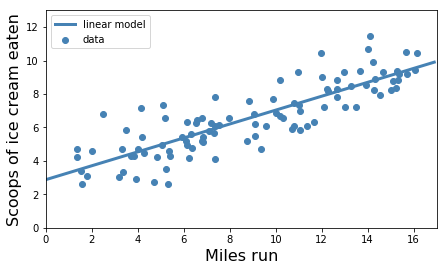

In [19]:
# SOLUTION:

x_miles = np.arange(0,17,0.1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.plot(x_miles, alpha + beta*x_miles, color="steelblue", lw=3, label='linear model')
plt.scatter(dfTreats["miles"], dfTreats["scoops"], color="steelblue", label='data')
plt.legend()
ax.set_xlabel("Miles run", fontsize=16)
ax.set_ylabel("Scoops of ice cream eaten", fontsize=16)
ax.set_xlim([0,17])
ax.set_ylim([0,13])
plt.show()

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

**Solution**:

$\hat{\alpha}$ is the estimate of the amount of ice cream that the runner will eat even if they do not run.

$\hat{\beta}$ is the estimate of the additional ice cream consumed per mile run.

The relationship is positive.  We can see this because $\hat{\beta} = 0.416$, and because the slope of the fitted regression line in the graph is clearly positive.

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [20]:
# SOLUTION:

y = alpha + beta * 26.2
print("y(26.2) = {:.3f} scoops".format(y))

y(26.2) = 13.767 scoops


**Solution:**

This model could be problematic because as the number of miles run increases, the amount of ice cream just keeps increasing. Eventually, the runner might just not be able to eat more ice cream! What a shame.

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

**Solution:**

$100(1-\alpha)$% CI for $\beta$ is:  $\hat{\beta} \pm t_{\alpha/2, n-2} SE(\hat{\beta})$, 

where $SE(\hat{\beta}) = \dfrac{\hat{\sigma}}{\sqrt{\sum (x_i - \bar{x})^2}}$

and $\hat{\sigma} = \sqrt{\dfrac{SSE}{n-2}}$

In [21]:
alp = 0.34
tcrit = stats.t.ppf(1-alp/2, df=len(dfTreats)-2)

sse = np.sum((dfTreats["scoops"]-(alpha+beta*dfTreats["miles"]))**2)
ssx = np.sum((dfTreats["miles"]-dfTreats["miles"].mean())**2)
sigmahat = np.sqrt(sse/len(dfTreats))

CI = [beta + pm*sigmahat/np.sqrt(ssx) for pm in [-1, 1]]
print("{:0.0f}% CI for beta = [{:0.3f}, {:0.3f}]".format(100*(1-alp),CI[0],CI[1]))

66% CI for beta = [0.389, 0.442]


**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

**Solution:**

Temperature, precipitation, whether the runner is with friends or not, ...